In [2]:
# This part of the analysis is a decription of dataset following the EDA (Explorative Data Analysis) showing
# the columns or variables, the dimension of the dataset in rows and columns, the first five rows,
# I have also checked if there are null values which
# decided to delete. The reason why I decided to delete them is the impossibility to substitute them with
# the "mean" given the fact that I'm analyzing text data.
# here I import the necessary libraries 
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
import seaborn as sns
import pandas as pd
from pandas.compat import StringIO
from wordcloud import WordCloud

In [3]:
# read the data file. This data will be used in a two fold way. One, as dataframe in order to 
# perform EDA which is why I'm converting it into a dataframe in output 3. Two, in str format in order to calculate 
# the word frequency as explained in output nine.  
with open('job_skills.csv',  'r') as myfile:
  jobs = myfile.read()

In [10]:
type(jobs)

str

In [4]:
# convert it to dataframe. I will convert it to dataframe as it is the most useful format for doing EDA (Exploratory data analysis)
data_jobs = pd.read_csv(StringIO(jobs))

In [5]:
print('Step 1 - the columns of the dataset ')
print(data_jobs.columns)

Step 1 - the columns of the dataset 
Index(['Company', 'Title', 'Category', 'Location', 'Responsibilities',
       'Minimum Qualifications', 'Preferred Qualifications'],
      dtype='object')


In [6]:
print('Step 2 - the shape of the data in rows and columns')
print('shape of the datasets = ',data_jobs.shape)

Step 2 - the shape of the data in rows and columns
shape of the datasets =  (1250, 7)


In [7]:
print('Step 3 - the first five rows of the data')
print(data_jobs.head(5))

Step 3 - the first five rows of the data
  Company                                              Title  \
0  Google                       Google Cloud Program Manager   
1  Google  Supplier Development Engineer (SDE), Cable/Con...   
2  Google  Data Analyst, Product and Tools Operations, Go...   
3  Google            Developer Advocate, Partner Engineering   
4  Google     Program Manager, Audio Visual (AV) Deployments   

                       Category                          Location  \
0            Program Management                         Singapore   
1  Manufacturing & Supply Chain                   Shanghai, China   
2           Technical Solutions       New York, NY, United States   
3           Developer Relations  Mountain View, CA, United States   
4            Program Management      Sunnyvale, CA, United States   

                                    Responsibilities  \
0  Shape, shepherd, ship, and show technical prog...   
1  Drive cross-functional activities in the sup

In [8]:
print('Step 4 - Check if there are null values')
print('There are null variables = ', data_jobs.isnull().sum())

Step 4 - Check if there are null values
There are null variables =  Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64


In [9]:
print('Step 5 - Delete eventual null values')
data_jobs = data_jobs.dropna()
print('Final shape of the dataset after deleting rows with null values ')
print('After deleting 15 rows containing null values the new dimension of the dataset is as follows : ',data_jobs.shape)
print(data_jobs)

Step 5 - Delete eventual null values
Final shape of the dataset after deleting rows with null values 
After deleting 15 rows containing null values the new dimension of the dataset is as follows :  (1235, 7)
      Company                                              Title  \
0      Google                       Google Cloud Program Manager   
1      Google  Supplier Development Engineer (SDE), Cable/Con...   
2      Google  Data Analyst, Product and Tools Operations, Go...   
3      Google            Developer Advocate, Partner Engineering   
4      Google     Program Manager, Audio Visual (AV) Deployments   
5      Google  Associate Account Strategist (Czech/Slovak), G...   
6      Google  Supplier Development Engineer, Camera, Consume...   
7      Google  Strategic Technology Partner Manager, Healthca...   
8      Google    Manufacturing Business Manager, Google Hardware   
9      Google  Solutions Architect, Healthcare and Life Scien...   
10     Google                    Data Analys

In [10]:
# the process of text analysis goes through the followng steps :
# 1-tokenize the text in single words
# 2-put all the words in lower case
# 3- remove stop words such as 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'you', "you're"


In [11]:
# instantiate a tokenizer with RegexpTokenizer and use it to create tokens (words) from the text
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(jobs)


In [12]:
# create list where to put the lower case tokens
words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())


In [13]:
# remove stopwords such as 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"
# and print them
sw = nltk.corpus.stopwords.words('english')
print(sw[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [14]:
# Initialize new list that will contain text without stop words
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

In [15]:
# Print several list items as sanity check
print(words_ns[:20])

['company', 'title', 'category', 'location', 'responsibilities', 'minimum', 'qualifications', 'preferred', 'qualifications', 'google', 'google', 'cloud', 'program', 'manager', 'program', 'management', 'singapore', 'shape', 'shepherd', 'ship']


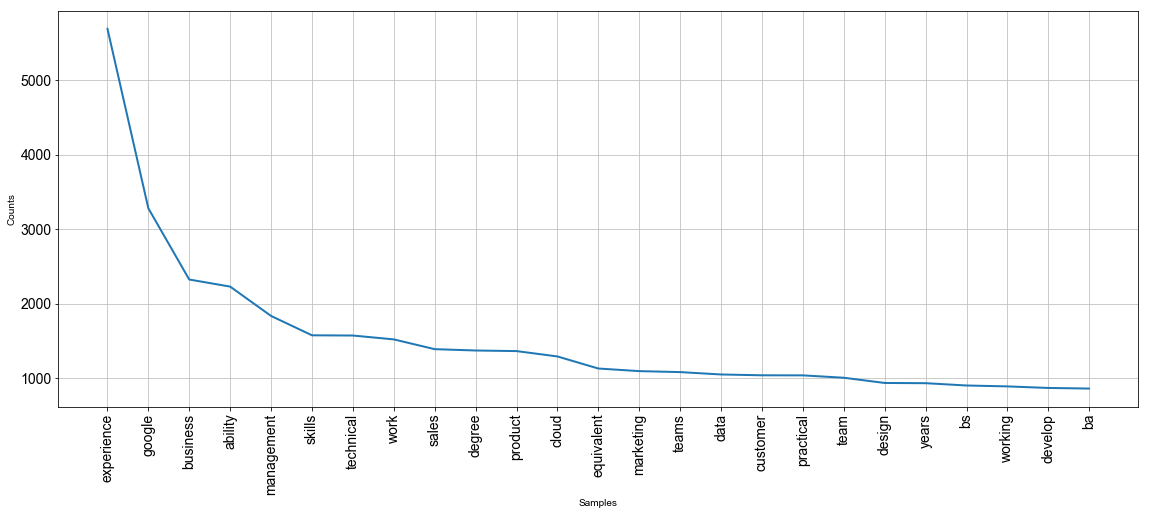

In [16]:
# plot the frequency of the words 
# adjust the plot margins.
plt.figure(figsize=(20,10))

plt.subplots_adjust(left=0.15, bottom=0.25, right=0.9, top=0.8)
plt.tick_params(labelsize=14)

# Figures inline and set visualization style
# matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

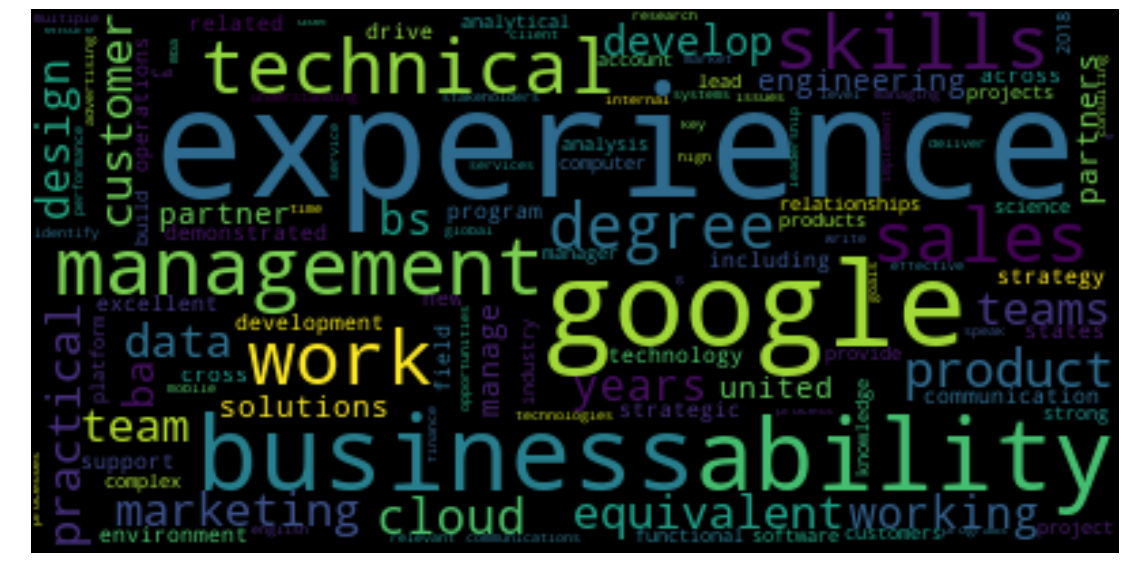

In [17]:
# here I add a word cloud graphics which shows the most common words

wcloud = WordCloud().generate_from_frequencies(freqdist1)
plt.figure(figsize=(20,10))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()